In [27]:
import pandas as pd
import numpy as np

from sklearn import datasets
data_dir = "../datasets/"
titanic_path = "../datasets/titanic/train.csv"
bike_path = "../datasets/bike-sharing-demand/train.csv"
X_iris, y_iris = datasets.load_iris(return_X_y=True, as_frame=True)
df_iris = pd.concat([X_iris, y_iris], axis=1)
X_diab, y_diab = datasets.load_diabetes(return_X_y=True, as_frame=True)
df_diab = pd.concat([X_diab, y_diab], axis=1)

import warnings
warnings.filterwarnings('ignore')

## 8. 월별로 데이터 집계

In [2]:
df = pd.read_csv(bike_path)

In [3]:
df['date'] = pd.to_datetime(df['datetime'])

In [4]:
df['year-month'] = df['date'].dt.strftime("%Y%m")

In [5]:
df[['date', 'year-month']].head(3)

,date,year-month
0,2011-01-01 00:00:00,201101
1,2011-01-01 01:00:00,201101
2,2011-01-01 02:00:00,201101


In [7]:
df.groupby('year-month').sum()['casual']

year-month
201101     2008
201102     3776
201103     7910
201104    12229
201105    15865
201106    19600
201107    26145
201108    17580
201109    18311
201110    17159
201111    10155
201112     5079
201201     5244
201202     5521
201203    17146
201204    27584
201205    25420
201206    28974
201207    24802
201208    28290
201209    27590
201210    20928
201211    15198
201212     9621
Name: casual, dtype: int64

## 9. 월별, 상품별로 데이터 집계

In [18]:
df['hum_bin'] = pd.cut(df['humidity'], bins=10)

In [20]:
df.groupby(['season', 'hum_bin']).sum()[['casual', 'registered']]

casual  registered
season hum_bin                          
1      (-0.1, 10.0]       81         726
       (10.0, 20.0]      691        1703
       (20.0, 30.0]     4330       19811
       (30.0, 40.0]    10337       62540
       (40.0, 50.0]     9372       58813
       (50.0, 60.0]     6308       42412
       (60.0, 70.0]     4324       33139
       (70.0, 80.0]     2904       19036
       (80.0, 90.0]     2543       22999
       (90.0, 100.0]     715        9714
2      (-0.1, 10.0]        0           0
       (10.0, 20.0]     3050        4801
       (20.0, 30.0]    18685       51075
       (30.0, 40.0]    28222       80526
       (40.0, 50.0]    23453       80025
       (50.0, 60.0]    20981       73999
       (60.0, 70.0]    14732       58298
       (70.0, 80.0]    11029       52828
       (80.0, 90.0]     8147       48736
       (90.0, 100.0]    1373        8322
3      (-0.1, 10.0]        0           0
       (10.0, 20.0]      532         912
       (20.0, 30.0]     5834       18247
       (30.0, 40.0]    23355       65178
       (40.0, 50.0]    30062       88400
       (50.0, 60.0]    28834       97347
       (60.0, 70.0]    30454      111943
       (70.0, 80.0]    15463       68868
       (80.0, 90.0]     7534       42387
       (90.0, 100.0]     650        4662
4      (-0.1, 10.0]        0           0
       (10.0, 20.0]      152        1422
       (20.0, 30.0]     1266        4682
       (30.0, 40.0]    14259       45065
       (40.0, 50.0]    20525       99345
       (50.0, 60.0]    13794       92347
       (60.0, 70.0]    11290       80074
       (70.0, 80.0]     7964       56909
       (80.0, 90.0]     6927       59950
       (90.0, 100.0]    1963       26100

In [21]:
pd.pivot_table(df, index='season', columns='hum_bin', values=['casual', 'registered'], aggfunc='sum')

casual                                                      \
hum_bin (-0.1, 10.0] (10.0, 20.0] (20.0, 30.0] (30.0, 40.0] (40.0, 50.0]   
season                                                                     
1                 81          691         4330        10337         9372   
2                  0         3050        18685        28222        23453   
3                  0          532         5834        23355        30062   
4                  0          152         1266        14259        20525   

                                                                           \
hum_bin (50.0, 60.0] (60.0, 70.0] (70.0, 80.0] (80.0, 90.0] (90.0, 100.0]   
season                                                                      
1               6308         4324         2904         2543           715   
2              20981        14732        11029         8147          1373   
3              28834        30454        15463         7534           650   
4              13794        11290         7964         6927          1963   

          registered                                                      \
hum_bin (-0.1, 10.0] (10.0, 20.0] (20.0, 30.0] (30.0, 40.0] (40.0, 50.0]   
season                                                                     
1                726         1703        19811        62540        58813   
2                  0         4801        51075        80526        80025   
3                  0          912        18247        65178        88400   
4                  0         1422         4682        45065        99345   

                                                                           
hum_bin (50.0, 60.0] (60.0, 70.0] (70.0, 80.0] (80.0, 90.0] (90.0, 100.0]  
season                                                                     
1              42412        33139        19036        22999          9714  
2              73999        58298        52828        48736          8322  
3              97347       111943        68868        42387          4662  
4              92347        80074        56909        59950         26100

## 10. 상품별 매출 추이 시각화

In [22]:
graph_data = pd.pivot_table(df, index='season', columns='hum_bin', values='casual', aggfunc='sum')

In [23]:
graph_data

hum_bin,"(-0.1, 10.0]","(10.0, 20.0]","(20.0, 30.0]","(30.0, 40.0]","(40.0, 50.0]","(50.0, 60.0]","(60.0, 70.0]","(70.0, 80.0]","(80.0, 90.0]","(90.0, 100.0]"
season,,,,,,,,,,
1,81,691,4330,10337,9372,6308,4324,2904,2543,715
2,0,3050,18685,28222,23453,20981,14732,11029,8147,1373
3,0,532,5834,23355,30062,28834,30454,15463,7534,650
4,0,152,1266,14259,20525,13794,11290,7964,6927,1963


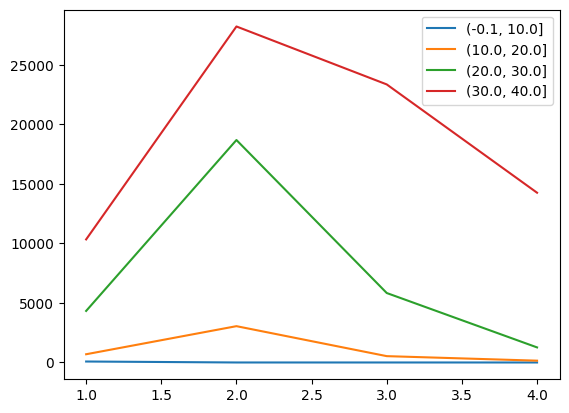

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(list(graph_data.index), graph_data.iloc[:,0], label=graph_data.columns[0])
plt.plot(list(graph_data.index), graph_data.iloc[:,1], label=graph_data.columns[1])
plt.plot(list(graph_data.index), graph_data.iloc[:,2], label=graph_data.columns[2])
plt.plot(list(graph_data.index), graph_data.iloc[:,3], label=graph_data.columns[3])
plt.legend();

## 14. 상품명 오류 수정

In [31]:
uriage_data = pd.read_csv(data_dir + "uriage.csv")
kokyaku_data = pd.read_excel(data_dir + "kokyaku_daicho.xlsx")

In [33]:
uriage_data.head(3)

,purchase_date,item_name,item_price,customer_name
0,2019-06-13 18:02,상품A,100.0,김가온
1,2019-07-13 13:05,상 품 S,NaN,김우찬
2,2019-05-11 19:42,상 품 a,NaN,김유찬


In [34]:
kokyaku_data.head(3)

,고객이름,지역,등록일
0,김 현성,H시,2018-01-04 00:00:00
1,김 도윤,E시,42782
2,김 지한,A시,2018-01-07 00:00:00


In [36]:
uriage_data['item_name'] = uriage_data['item_name'].str.upper()
uriage_data['item_name'] = uriage_data['item_name'].str.replace("  ", "")
uriage_data['item_name'] = uriage_data['item_name'].str.replace(" ", "")
uriage_data.sort_values(by=['item_name'], ascending=True)

,purchase_date,item_name,item_price,customer_name
0,2019-06-13 18:02,상품A,100.0,김가온
1748,2019-05-19 20:22,상품A,100.0,김시훈
223,2019-06-25 8:13,상품A,100.0,김유진
1742,2019-06-13 16:03,상품A,100.0,김건희
1738,2019-02-10 0:28,상품A,100.0,김하랑
...,...,...,...,...
2880,2019-04-22 0:36,상품Y,NaN,김동욱
2881,2019-04-30 14:21,상품Y,NaN,김하준
1525,2019-01-24 10:27,상품Y,2500.0,김범준
1361,2019-05-28 13:45,상품Y,2500.0,김수현


In [38]:
print(len(uriage_data['item_name'].unique()))
print(pd.unique(uriage_data['item_name']))

26
['상품A' '상품S' '상품Z' '상품V' '상품O' '상품U' '상품L' '상품C' '상품I' '상품R' '상품X' '상품G'
 '상품P' '상품Q' '상품Y' '상품N' '상품W' '상품E' '상품K' '상품B' '상품F' '상품D' '상품M' '상품H'
 '상품T' '상품J']


In [40]:
data = [1,2,3]